# Simulate Artificial Physiological Signals

This example can be referenced by [citing the package](https://neuropsychology.github.io/NeuroKit/cite_us.html).

NeuroKit's core signal processing functions surround electrocardiogram (ECG), respiratory (RSP), electrodermal activity (EDA), and electromyography (EMG) data. Hence, this example shows how to use NeuroKit to simulate these physiological signals with customized parametric control.

In [2]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Note: this cell is hidden using the "remove-input" tag
# Make bigger images
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]  
plt.rcParams['font.size']= 14

## Cardiac Activity (ECG)

With `ecg_simulate()`, you can generate an artificial ECG signal of a desired length (in this case here, `duration=10`), noise, and heart rate. As you can see in the plot below, *ecg50* has about half the number of heart beats than *ecg100*, and *ecg50* also has more noise in the signal than the latter.

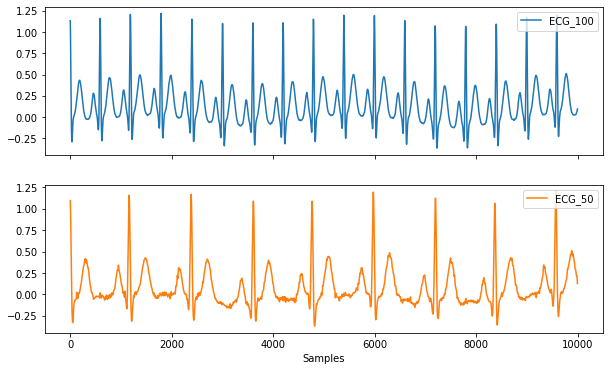

In [4]:
# Alternate heart rate and noise levels
ecg50 = nk.ecg_simulate(duration=10, noise=0.05, heart_rate=50)
ecg100 = nk.ecg_simulate(duration=10, noise=0.01, heart_rate=100)

# Visualize
ecg_df = pd.DataFrame({"ECG_100": ecg100, "ECG_50": ecg50})

nk.signal_plot(ecg_df, subplots=True)

You can also choose to generate the default, simple simulation based on Daubechies wavelets, which roughly approximates one cardiac cycle, or a more complex one by specifiying `method="ecgsyn"`.

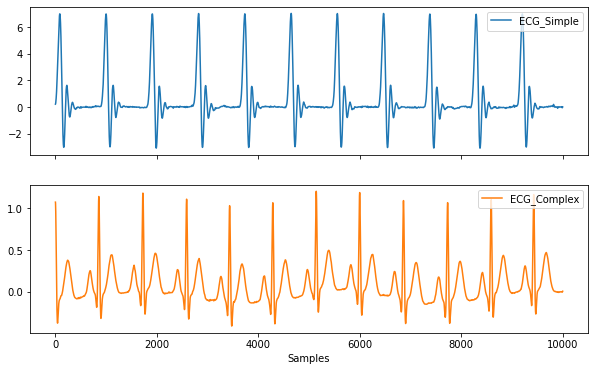

In [5]:
# Alternate methods
ecg_sim = nk.ecg_simulate(duration=10, method="simple")
ecg_com = nk.ecg_simulate(duration=10, method="ecgsyn")

# Visualize
methods = pd.DataFrame({"ECG_Simple": ecg_sim, "ECG_Complex": ecg_com})
nk.signal_plot(methods, subplots=True)

## Respiration (RSP)

To simulate a synthetic respiratory signal, you can use `rsp_simulate()` and choose a specific duration and breathing rate. In this example below, you can see that *rsp7* has a lower breathing rate than *rsp15*. You can also decide which model you want to generate the signal. The *simple rsp15* signal incorporates `method = "sinusoidal"` which approximates a respiratory cycle based on the trigonometric sine wave. On the other hand, the *complex rsp15* signal specifies `method = "breathmetrics"` which uses a more advanced model by interpolating inhalation and exhalation pauses between each respiratory cycle.

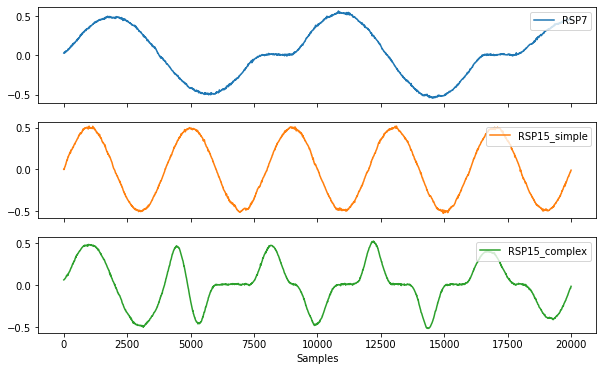

In [6]:
# Simulate
rsp15_sim = nk.rsp_simulate(duration=20, respiratory_rate=15, method="sinusoidal")
rsp15_com = nk.rsp_simulate(duration=20, respiratory_rate=15, method="breathmetrics")
rsp7 = nk.rsp_simulate(duration=20, respiratory_rate=7, method="breathmetrics")

# Visualize respiration rate
rsp_df = pd.DataFrame({"RSP7": rsp7,
                       "RSP15_simple": rsp15_sim,
                       "RSP15_complex": rsp15_com})
nk.signal_plot(rsp_df, subplots=True)

## Electromyography (EMG)

Now, we come to generating an artificial EMG signal using `emg_simulate()`. Here, you can specify the number of bursts of muscular activity (`n_bursts`) in the signal as well as the duration of the bursts (`duration_bursts`). As you can see the active muscle periods in *EMG2_Longer* are greater in duration than that of *EMG2*, and *EMG5* contains more bursts than the former two.  

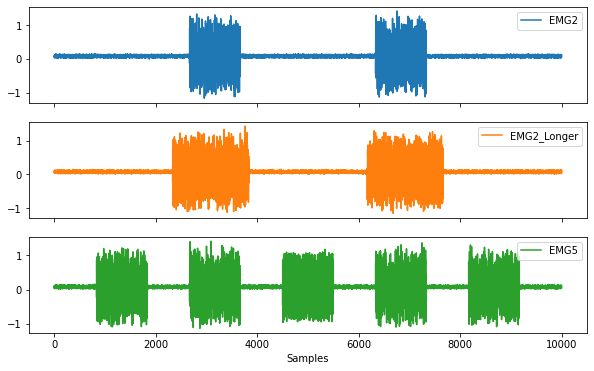

In [7]:
# Simulate
emg2 = nk.emg_simulate(duration=10, burst_number=2, burst_duration=1.0)
emg2_long = nk.emg_simulate(duration=10, burst_number=2, burst_duration=1.5)
emg5 = nk.emg_simulate(duration=10, burst_number=5, burst_duration=1.0)

# Visualize
emg_df = pd.DataFrame({"EMG2": emg2,
                       "EMG2_Longer": emg2_long,
                       "EMG5": emg5})
nk.signal_plot(emg_df,subplots=True)

## Electrodermal Activity (EDA)

Finally, `eda_simulate()` can be used to generate a synthetic EDA signal of a given duration, specifying the number of skin conductance responses or activity 'peaks' (`n_scr`) and the `drift` of the signal. You can also modify the noise level of the signal.

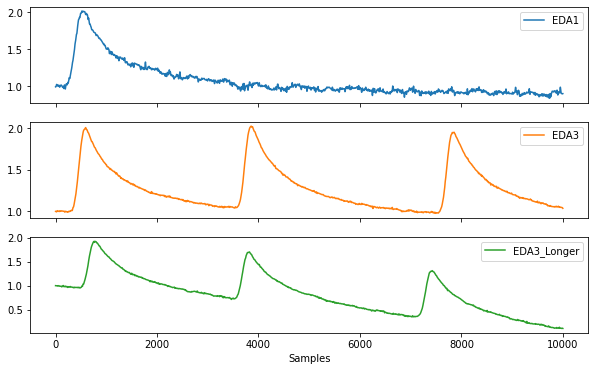

In [8]:
# Simulate
eda1 = nk.eda_simulate(duration=10, scr_number=1, drift=-0.01, noise=0.05)
eda3 = nk.eda_simulate(duration=10, scr_number=3, drift=-0.01, noise=0.01)
eda3_long = nk.eda_simulate(duration=10, scr_number=3, drift=-0.1, noise=0.01)

# Visualize
eda_df = pd.DataFrame({"EDA1": eda1,
                       "EDA3": eda3,
                       "EDA3_Longer": eda3_long})
nk.signal_plot(eda_df, subplots=True)